# Comparação entre os modelos CNN

## Importação das bibliotecas

In [20]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import glob
import pandas as pd
import numpy as np
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from tensorflow.keras.models import load_model

# 1 Comparar os modelos CNN simples vs CNN simple mas otimizado

## 1.1 Carregar métricas dos modelos

In [3]:
with open("models/05_cnn/cnn_metrics_v1.json") as f:
    metrics_cnn_v1 = json.load(f)

with open("models/06_cnn_v2/cnn_v2_metrics.json") as f:
    metrics_cnn_v2 = json.load(f)

## 1.2 Organizar dados em DataFrame

In [4]:
results = pd.DataFrame([
    metrics_cnn_v1,
    metrics_cnn_v2
])

In [5]:
# Converter tempos para ms/segundos com precisão
# Arredondar valores para melhor leitura
results["train_time_sec"] = results["train_time_sec"].round(2)
results["inference_time_ms"] = results["inference_time_ms"].round(2)

## 1.3 Visualização Comparativa das métricas

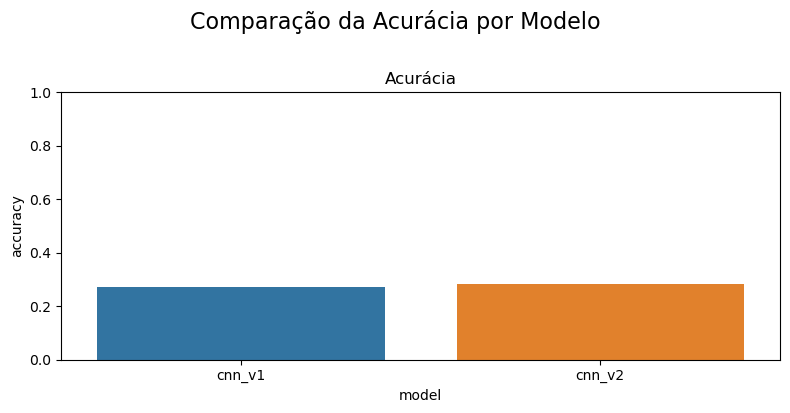

In [6]:
plt.figure(figsize=(8, 4))  

# Acurácia
plt.subplot()
sns.barplot(data=results, x="model", y="accuracy")
plt.title("Acurácia")
plt.ylim(0, 1)
plt.suptitle("Comparação da Acurácia por Modelo", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


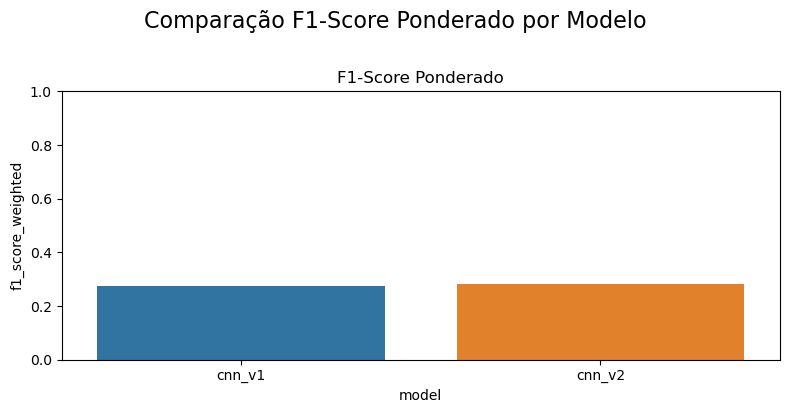

In [7]:
# F1-Score Ponderado
plt.figure(figsize=(8, 4))  

plt.subplot()
sns.barplot(data=results, x="model", y="f1_score_weighted")
plt.title("F1-Score Ponderado")
plt.ylim(0, 1)

plt.suptitle("Comparação F1-Score Ponderado por Modelo", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

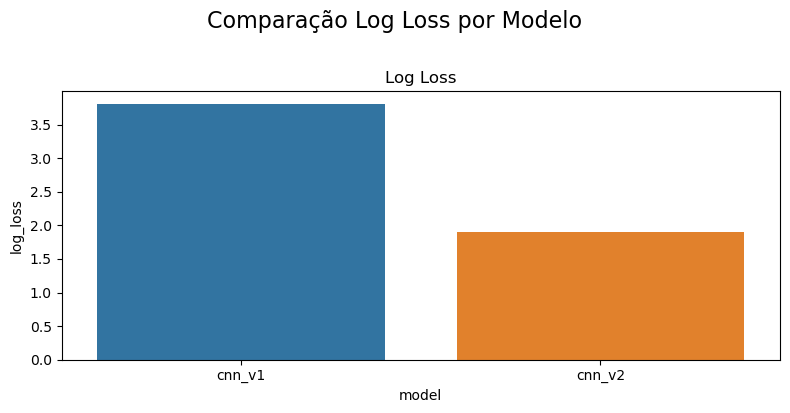

In [8]:
# Log Loss
plt.figure(figsize=(8, 4))  

plt.subplot()
sns.barplot(data=results, x="model", y="log_loss")
plt.title("Log Loss")

plt.suptitle("Comparação Log Loss por Modelo", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

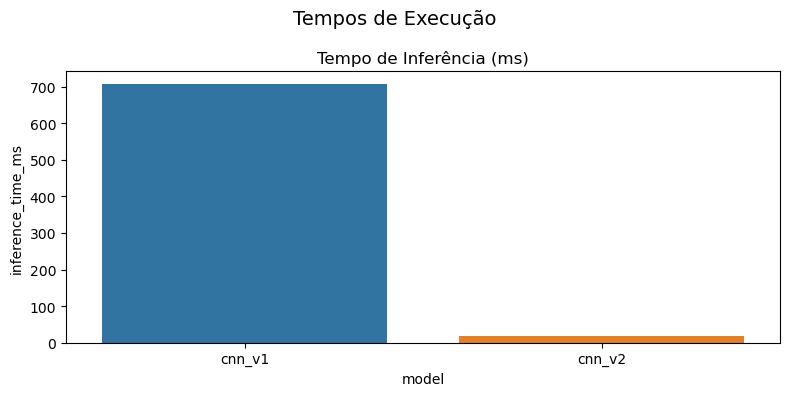

In [9]:
# Tempo de Inferência
plt.figure(figsize=(8, 4))  

plt.subplot()
sns.barplot(data=results, x="model", y="inference_time_ms")
plt.title("Tempo de Inferência (ms)")

plt.suptitle("Tempos de Execução", fontsize=14)
plt.tight_layout()
plt.show()

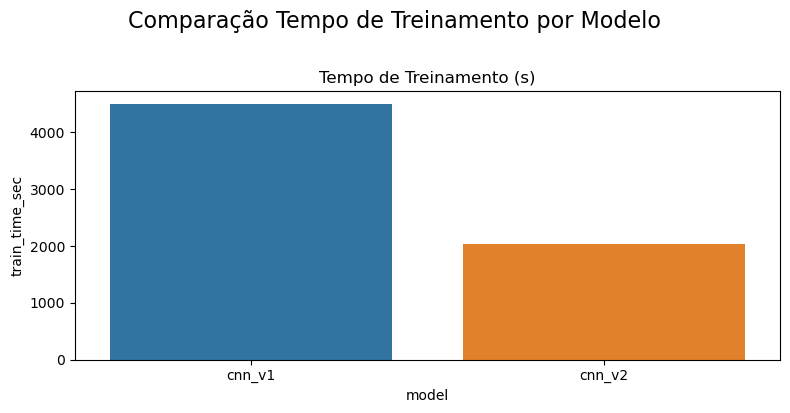

In [10]:
# Tempo de Treinamento
plt.figure(figsize=(8, 4))  

plt.subplot()
sns.barplot(data=results, x="model", y="train_time_sec")
plt.title("Tempo de Treinamento (s)")

plt.suptitle("Comparação Tempo de Treinamento por Modelo", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 1.4 Tabela de Comparacao

In [27]:
print("\n Tabela comparativa das métricas:\n")
display(results[["model", "accuracy", "f1_score_weighted", "log_loss", "train_time_sec", "inference_time_ms"]])


 Tabela comparativa das métricas:



,model,accuracy,f1_score_weighted,log_loss,train_time_sec,inference_time_ms
0,cnn_v1,0.272727,0.273634,3.805738,4497.54,706.35
1,cnn_v2,0.282297,0.283232,1.897452,2031.00,19.54
